In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def kernel(a, b, theta):
    sqdist = np.sum(a**2, axis=1).reshape(-1, 1) + np.sum(b**2, axis=1) - 2*np.dot(a, b.T)
    return theta[0]*np.exp(-theta[1]/2 * sqdist) + theta[2] + theta[3]*a.dot(b.T)

In [3]:
N = 101
s = 1e-4
theta = np.ones(4)
thetas = np.array([[1, 4, 0, 0],
                   [9, 4, 0, 0],
                   [1, 64, 0, 0],
                   [1, 0.25, 0, 0],
                   [1, 4, 10, 0],
                   [1, 4, 0, 5]])
X = np.linspace(-1, 1, N).reshape(N, 1)
y = X + s * np.random.randn(N, 1)

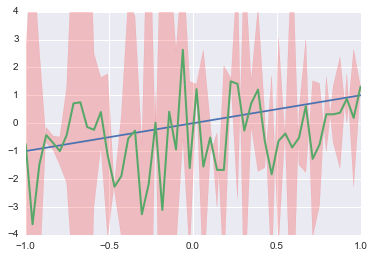

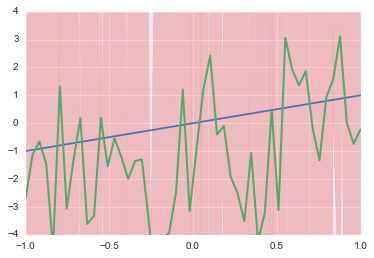

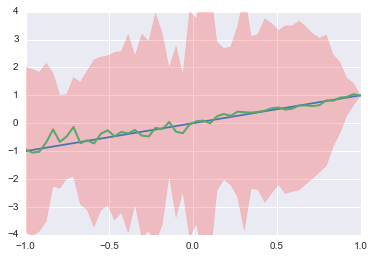

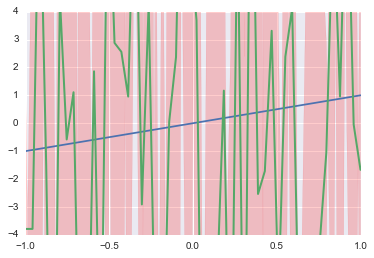

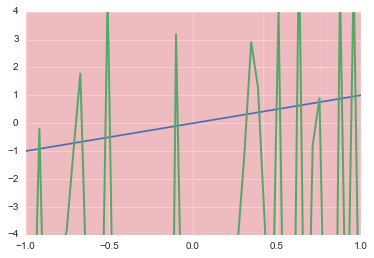

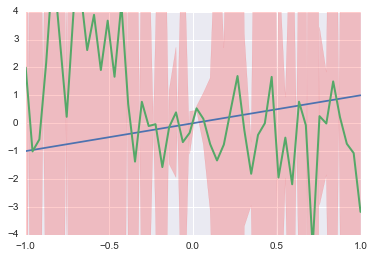

In [19]:
for theta in thetas:
    K = kernel(X, X, theta)
    Xtest = np.linspace(-1, 1, 50).reshape(-1,1)
    mus = np.zeros(Xtest.shape[0])
    std = np.zeros(Xtest.shape[0])
    for i, x in enumerate(Xtest):
        k = kernel(X, x.reshape(1, -1), theta)
        kT_Cinv = k.T.dot(np.linalg.inv(K) + s**2)
        mus[i] = kT_Cinv.dot(y)
        #mus[i] = np.sum(np.linalg.inv(K).dot(y) * kernel(X, x.reshape(1, -1), theta))
        std[i] = k[-1] - kT_Cinv.dot(k)
    plt.plot(X, X)
    plt.fill_between(Xtest.flat, (mus-3*std), (mus+3*std), alpha=0.2, color='r')
    plt.plot(Xtest, mus, lw=2)
    plt.axis([-1, 1, -4, 4])
    plt.show()

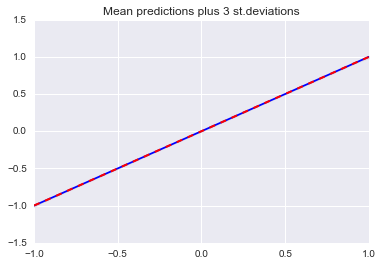

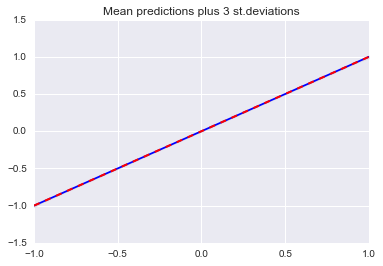

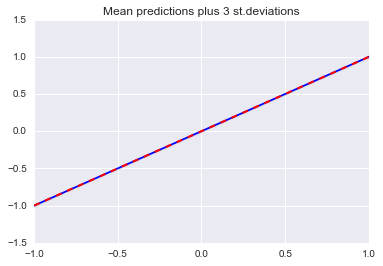

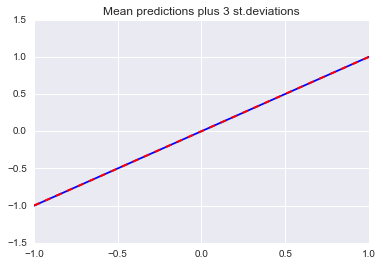

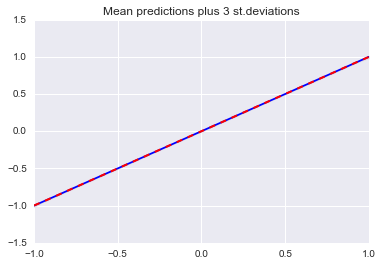

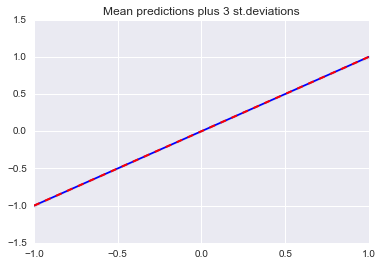

In [7]:
for theta in thetas:
    K = kernel(X, X, theta)
    L = np.linalg.cholesky(K + s*np.eye(N))

    # points we're going to make predictions at.
    Xtest = np.linspace(-1, 1, 50).reshape(-1,1)

    # compute the mean at our test points.
    Lk = np.linalg.solve(L, kernel(X, Xtest, theta))
    mu = np.dot(Lk.T, np.linalg.solve(L, y))

    # compute the variance at our test points.
    K_ = kernel(Xtest, Xtest, theta)
    s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
    std = np.sqrt(s2).reshape(-1, 1)

    # PLOTS:
    plt.clf()
    plt.plot(X, y, 'r+', ms=20)
    plt.plot(Xtest, Xtest, 'b-')
    plt.fill_between(Xtest.flatten(), (mu-3*std).flatten(), (mu+3*std).flatten(), color="#dddddd")
    plt.plot(Xtest, mu, 'r--', lw=2)
    plt.savefig('predictive.png', bbox_inches='tight')
    plt.title('Mean predictions plus 3 st.deviations')
    plt.show()

In [ ]:
plt.plot(X)
for _ in range(5):
    plt.plot(np.random.multivariate_normal(np.zeros(N), K))
plt.show()

In [ ]:
D = np.array([[-0.5, 0.5],
              [0.2, -1],
              [0.3, 3],
              [-0.1, -2.5]])

In [ ]:
N = 4
K = np.zeros((N, N))
for n in range(N):
    for m in range(N):
        K[n, m] = kernel(D[n].T, X[m].T, theta)

In [ ]:
plt.scatter(D[:, 0], D[:, 1])
for _ in range(5):
    plt.plot(np.random.multivariate_normal(np.zeros(N), K))
plt.show()